In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
wrs = pd.read_csv('../Capstone_csv_file/wrs_fum_salary_17-18')

In [3]:
wrs.dtypes

NAME         object
FUM           int64
FUM_rank    float64
salary        int64
dtype: object

In [4]:
wrs.head()

,NAME,FUM,FUM_rank,salary
0,Kenny Britt,0,40.5,1200000
1,Jarius Wright,0,40.5,3700000
2,Albert Wilson,0,40.5,1797000
3,Tyler Boyd,0,40.5,10762500
4,Kendall Wright,0,40.5,2000000


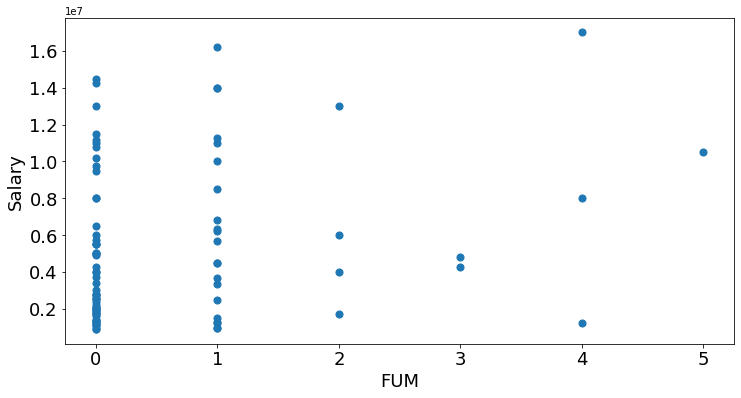

In [5]:
ax = wrs.plot(kind="scatter", x = 'FUM',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('FUM', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(wrs.loc[:, ['FUM', 'salary']])

In [7]:
X.mean(axis = 0)

array([-5.10447368e-17, -7.65671051e-18])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.17869781,  0.07574432],
       [ 3.53930559,  1.54313318],
       [-0.42052814, -0.79649139],
       [ 1.96023079, -0.39826343],
       [-0.12043248,  1.59746884]])

In [11]:
km.predict(X)

array([2, 2, 2, 4, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 4, 2, 0, 0, 2, 2, 2, 4, 4, 4, 2,
       4, 4, 0, 4, 2, 2, 0, 2, 0, 2, 4, 4, 0, 0, 2, 4, 0, 2, 0, 4, 4, 4,
       2, 4, 0, 4, 2, 0, 0, 2, 0, 2, 0, 3, 3, 3, 4, 3, 3, 1, 1, 3, 1],
      dtype=int32)

In [12]:
wrs['clusters'] = km.labels_
wrs.head()

,NAME,FUM,FUM_rank,salary,clusters
0,Kenny Britt,0,40.5,1200000,2
1,Jarius Wright,0,40.5,3700000,2
2,Albert Wilson,0,40.5,1797000,2
3,Tyler Boyd,0,40.5,10762500,4
4,Kendall Wright,0,40.5,2000000,2


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[4.09090909e-01, 5.65577468e+06],
       [4.33333333e+00, 1.18333333e+07],
       [1.53846154e-01, 1.98375056e+06],
       [2.66666667e+00, 3.66025000e+06],
       [4.70588235e-01, 1.20620809e+07]])

In [14]:
wrs.groupby('clusters')[['FUM', 'salary']].mean()

,FUM,salary
clusters,,
0,0.409091,5.655775e+06
1,4.333333,1.183333e+07
2,0.153846,1.983751e+06
3,2.666667,3.660250e+06
4,0.470588,1.206208e+07


In [15]:
centroids = wrs.groupby('clusters')[['FUM', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

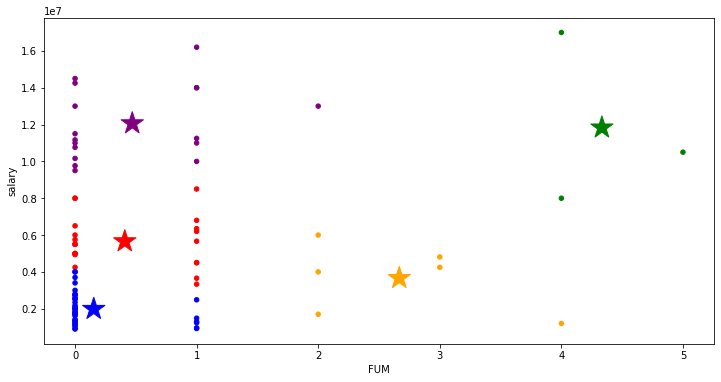

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
wrs['color'] = wrs['clusters'].map(lambda p: colors[p])

ax = wrs.plot(    
    kind = 'scatter', 
    x = 'FUM', y = 'salary',
    figsize = (12,6),
    c = wrs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'FUM', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

29.17327731996774

In [18]:
silhouette_score(X, km.labels_)

0.4604868178669511